In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
super_data=pd.read_csv(r'C:\Users\Salma K\Documents\Ijazpython\Data analytics project with python\Big basket\BigBasket Products.csv')
super_data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [115]:
super_data.shape

(27555, 10)

In [116]:
super_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [117]:
Q1 = super_data["rating"].quantile(0.25)
Q3 = super_data["rating"].quantile(0.75)

IQR = Q3-Q1

Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR


Q1, Q3, IQR, Lower_limit, Upper_limit

(3.7, 4.3, 0.5999999999999996, 2.8000000000000007, 5.199999999999999)

In [118]:
outliers = super_data[(super_data["rating"] < Lower_limit) | (super_data["rating"] > Upper_limit)]
outliers.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
11,12,Butter Cookies Gold Collection,Gourmet & World Food,Chocolates & Biscuits,Sapphire,600.00,600.0,"Luxury Chocolates, Gifts",2.2,Enjoy a tin full of delicious butter cookies m...
29,30,Lip Butter - Rose,Beauty & Hygiene,Skin Care,Organic Harvest,169.15,199.0,Lip Care,1.5,Reload the dry and chapped lips with Organic L...
43,44,Storage/Lunch Steel Container with PP Lid - Red,"Kitchen, Garden & Pets",Steel Utensils,Classic Essentials,109.00,299.0,Steel Lunch Boxes,2.6,Add a dash of colour to your kitchen with thes...
64,65,Aqua Halo Rejuvenating Conditioner,Beauty & Hygiene,Hair Care,Azafran,168.75,225.0,Shampoo & Conditioner,1.0,This Aqua Halo Rejuvenating Conditioner is an ...


In [119]:
outliers.shape

(1312, 10)

In [120]:
super_data['rating'].median()

4.1

In [121]:
super_data['rating'].mean()

3.943409583179249

In [122]:
super_data['rating']=super_data['rating'].fillna(super_data['rating'].median())

In [123]:
super_data.isnull().sum()

index             0
product           1
category          0
sub_category      0
brand             1
sale_price        0
market_price      0
type              0
rating            0
description     115
dtype: int64

In [124]:
super_data.drop(columns='description',inplace=True)

In [125]:
super_data.isnull().sum()

index           0
product         1
category        0
sub_category    0
brand           1
sale_price      0
market_price    0
type            0
rating          0
dtype: int64

In [ ]:
super_data.dropna(inplace=True)

In [127]:
super_data.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
dtype: int64

***EDA - Exploratory Data Analysis of brand BigBasket data***

cleaning product column

In [128]:
product_value=super_data['product'].value_counts()

product_value

product
Turmeric Powder/Arisina Pudi                                     26
Extra Virgin Olive Oil                                           15
Cow Ghee/Tuppa                                                   14
Soft Drink                                                       12
Colorsilk Hair Colour With Keratin                               12
                                                                 ..
Pepper & Herb Salami Chicken                                      1
Nutmeg Powder                                                     1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude     1
Chocolates-Roasted Peanut Chocolate                               1
Green Tea - Pure Original                                         1
Name: count, Length: 23539, dtype: int64

In [129]:
product_less_than_5=product_value[product_value<5]
product_less_than_5

product
Nilgiri Green Tea - Yakuso Tulsi                                 4
Mixed Herbs                                                      4
Cool Bath Soap - 99.9% Germ Protection                           4
Microwave Popcorn - Butter                                       4
Cheese Cubes                                                     4
                                                                ..
Pepper & Herb Salami Chicken                                     1
Nutmeg Powder                                                    1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude    1
Chocolates-Roasted Peanut Chocolate                              1
Green Tea - Pure Original                                        1
Name: count, Length: 23436, dtype: int64

In [130]:
def handle_product(value):
  if (value in product_less_than_5):
    return 'others'

  else:
    return value

super_data['product']=super_data['product'].apply(handle_product)
p=super_data['product'].value_counts()
p

product
others                                26860
Turmeric Powder/Arisina Pudi             26
Extra Virgin Olive Oil                   15
Cow Ghee/Tuppa                           14
Colorsilk Hair Colour With Keratin       12
                                      ...  
Toilet Cleaner                            5
Kitchen King Masala                       5
Packaged Drinking Water                   5
Flax Seeds                                5
Casting Crème Gloss Small Pack            5
Name: count, Length: 104, dtype: int64

cleaning category column

In [131]:
category_value=super_data['category'].value_counts()

category_value

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2674
Beverages                    884
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64

cleaning subcategory column

In [132]:
sub_category_value=super_data['sub_category'].value_counts()

sub_category_value


sub_category
Skin Care                   2294
Health & Medicine           1133
Hair Care                   1028
Storage & Accessories       1015
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64

In [133]:
sub_category_less_than_500=sub_category_value[sub_category_value<500]
sub_category_less_than_500

sub_category
All Purpose Cleaners        475
Stationery                  410
Bins & Bathroom Ware        392
Dairy                       385
Pet Food & Accessories      356
                           ... 
Mutton & Lamb                20
Water                        17
Flower Bouquets, Bunches      8
Pork & Other Meats            5
Marinades                     1
Name: count, Length: 73, dtype: int64

In [134]:
def handle_sub_category(value):
  if (value in sub_category_less_than_500):
    return 'others'

  else:
    return value

super_data['sub_category']=super_data['sub_category'].apply(handle_sub_category)
sub_cat=super_data['sub_category'].value_counts()
sub_cat

sub_category
others                      12159
Skin Care                    2294
Health & Medicine            1133
Hair Care                    1028
Storage & Accessories        1015
Fragrances & Deos            1000
Bath & Hand Wash              996
Crockery & Cutlery            890
Masalas & Spices              889
Snacks, Dry Fruits, Nuts      840
Men's Grooming                805
Drinks & Beverages            736
Cooking & Baking Needs        693
Sauces, Spreads & Dips        667
Organic Staples               656
Ready To Cook & Eat           643
Chocolates & Biscuits         609
Snacks & Namkeen              500
Name: count, dtype: int64

cleaning brand column

In [135]:
brand_value=super_data['brand'].value_counts()

brand_value

brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
                   ... 
Wellastrate           1
Clean & Fresh         1
Lal                   1
Glint                 1
Baron De Bercy        1
Name: count, Length: 2313, dtype: int64

In [136]:
brand_less_than_100=brand_value[brand_value<100]
brand_less_than_100

brand
True Elements     99
Mamaearth         97
Graminway         96
HappyChef         96
Dettol            95
                  ..
Wellastrate        1
Clean & Fresh      1
Lal                1
Glint              1
Baron De Bercy     1
Name: count, Length: 2288, dtype: int64

In [137]:
def handle_brand(value):
  if (value in brand_less_than_100):
    return 'others'

  else:
    return value

super_data['brand']=super_data['brand'].apply(handle_brand)
b=super_data['brand'].value_counts()
b

brand
others              23127
Fresho                638
bb Royal              539
BB Home               428
DP                    250
Fresho Signature      171
bb Combo              168
Amul                  153
INATUR                146
Himalaya              141
Dabur                 138
GoodDiet              134
Cello                 124
Nike                  124
Iveo                  118
BIOTIQUE              117
Aroma Magic           109
Colgate               107
Organic Tattva        106
Loreal Paris          104
Britannia             104
Nakoda                103
Soulflower            102
NUTRIWISH             101
Keya                  101
MTR                   100
Name: count, dtype: int64

clening type column

In [138]:
type_value=super_data['type'].value_counts()

type_value

type
Face Care                1508
Ayurveda                  538
Men's Deodorants          500
Shampoo & Conditioner     461
Glassware                 415
                         ... 
Bagels & Baguette           1
Roses                       1
Marinated Meat              1
Organic Eggs                1
Turkey & Duck               1
Name: count, Length: 426, dtype: int64

In [139]:
type_less_than_200=type_value[type_value<200]
type_less_than_200

type
Face & Body                 198
Chips & Corn Snacks         186
Chocolates                  177
Cookies, Biscotti, Wafer    175
Herbs, Seasonings & Rubs    173
                           ... 
Bagels & Baguette             1
Roses                         1
Marinated Meat                1
Organic Eggs                  1
Turkey & Duck                 1
Name: count, Length: 399, dtype: int64

In [140]:
def handle_type(value):
  if (value in type_less_than_200):
    return 'others'

  else:
    return value

super_data['type']=super_data['type'].apply(handle_type)
t=super_data['type'].value_counts()
t

type
others                      18392
Face Care                    1508
Ayurveda                      538
Men's Deodorants              500
Shampoo & Conditioner         461
Glassware                     415
Containers Sets               415
Bathing Bars & Soaps          390
Blended Masalas               380
Body Care                     340
Gourmet Tea & Tea Bags        335
Water & Fridge Bottles        295
Namkeen & Savoury Snacks      276
Aromatherapy                  276
Supplements & Proteins        240
Hand Wash & Sanitizers        233
Pet Meals & Treats            230
Powdered Spices               222
Dry Fruits & Berries          219
Hair Oil & Serum              217
Diapers                       215
Roasted Seeds & Nuts          214
Lunch Boxes                   212
Eau De Toilette               211
Cups, Mugs & Tumblers         208
Breakfast & Snack Mixes       207
Organic Masalas & Spices      202
Healthy, Baked Snacks         202
Name: count, dtype: int64

type count data

In [141]:
t.head()

type
others                   18392
Face Care                 1508
Ayurveda                   538
Men's Deodorants           500
Shampoo & Conditioner      461
Name: count, dtype: int64

brand count data

In [142]:
b.head()

brand
others      23127
Fresho        638
bb Royal      539
BB Home       428
DP            250
Name: count, dtype: int64

categroy count

In [143]:
category_value.head()

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Name: count, dtype: int64

subcategry count

In [144]:
sub_cat.head()

sub_category
others                   12159
Skin Care                 2294
Health & Medicine         1133
Hair Care                 1028
Storage & Accessories     1015
Name: count, dtype: int64

In [145]:
super_data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,1,others,Beauty & Hygiene,Hair Care,others,220.0,220.0,Hair Oil & Serum,4.1
1,2,others,"Kitchen, Garden & Pets",Storage & Accessories,others,180.0,180.0,Water & Fridge Bottles,2.3
2,3,others,Cleaning & Household,others,others,119.0,250.0,others,3.4
3,4,others,Cleaning & Household,others,Nakoda,149.0,176.0,others,3.7
4,5,others,Beauty & Hygiene,Bath & Hand Wash,others,162.0,162.0,Bathing Bars & Soaps,4.4


In [146]:
super_data.to_csv('bigbasket_clean_data.csv',index=True)

Data visualization

product performsnce analysis--- category and subcategory

In [147]:
product=p.iloc[1: ]
product
sub_category=sub_cat.iloc[1: ]
sub_category
brand=b.iloc[1: ]
brand
Type=t.iloc[1: ]
Type

type
Face Care                   1508
Ayurveda                     538
Men's Deodorants             500
Shampoo & Conditioner        461
Glassware                    415
Containers Sets              415
Bathing Bars & Soaps         390
Blended Masalas              380
Body Care                    340
Gourmet Tea & Tea Bags       335
Water & Fridge Bottles       295
Namkeen & Savoury Snacks     276
Aromatherapy                 276
Supplements & Proteins       240
Hand Wash & Sanitizers       233
Pet Meals & Treats           230
Powdered Spices              222
Dry Fruits & Berries         219
Hair Oil & Serum             217
Diapers                      215
Roasted Seeds & Nuts         214
Lunch Boxes                  212
Eau De Toilette              211
Cups, Mugs & Tumblers        208
Breakfast & Snack Mixes      207
Organic Masalas & Spices     202
Healthy, Baked Snacks        202
Name: count, dtype: int64

In [148]:
category_value.index

Index(['Beauty & Hygiene', 'Gourmet & World Food', 'Kitchen, Garden & Pets',
       'Snacks & Branded Foods', 'Foodgrains, Oil & Masala',
       'Cleaning & Household', 'Beverages', 'Bakery, Cakes & Dairy',
       'Baby Care', 'Fruits & Vegetables', 'Eggs, Meat & Fish'],
      dtype='object', name='category')

In [149]:
category_value.values

array([7867, 4690, 3580, 2814, 2676, 2674,  884,  851,  610,  557,  350],
      dtype=int64)

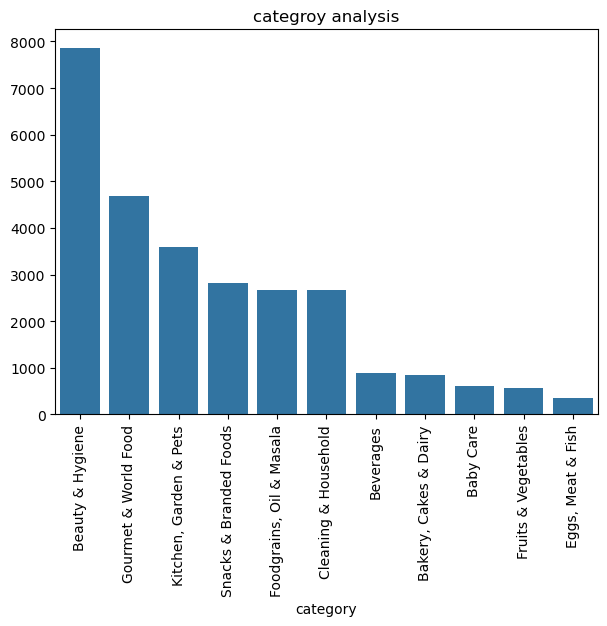

In [150]:
plt.figure(figsize=(7,5))
sns.barplot(x=category_value.index,y=category_value.values)
plt.xticks(rotation=90)
plt.title('categroy analysis')
plt.show()

C:\Users\Salma K\AppData\Local\Temp\ipykernel_1912\4104531168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_value.index,y=category_value.values,palette="Purples")


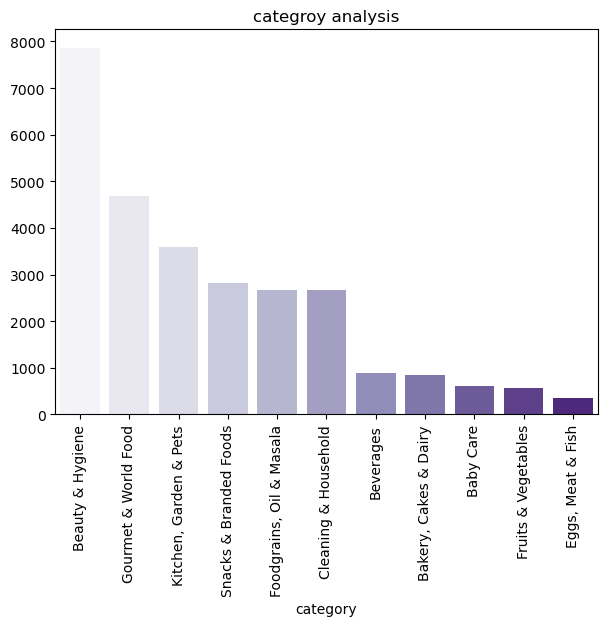

In [151]:
plt.figure(figsize=(7,5))
sns.barplot(x=category_value.index,y=category_value.values,palette="Purples")
plt.xticks(rotation=90)
plt.title('categroy analysis')
plt.show()

C:\Users\Salma K\AppData\Local\Temp\ipykernel_1912\1686947127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_value.index, y=category_value.values, palette="Purples")


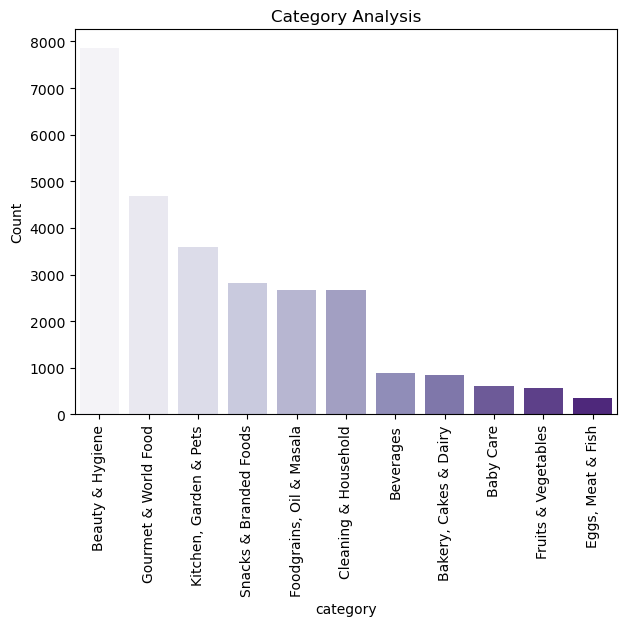

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x=category_value.index, y=category_value.values, palette="Purples")
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Category Analysis')
plt.show()

C:\Users\Salma K\AppData\Local\Temp\ipykernel_1912\2870675213.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=category_value.index, y=category_value.values, palette="Purples")


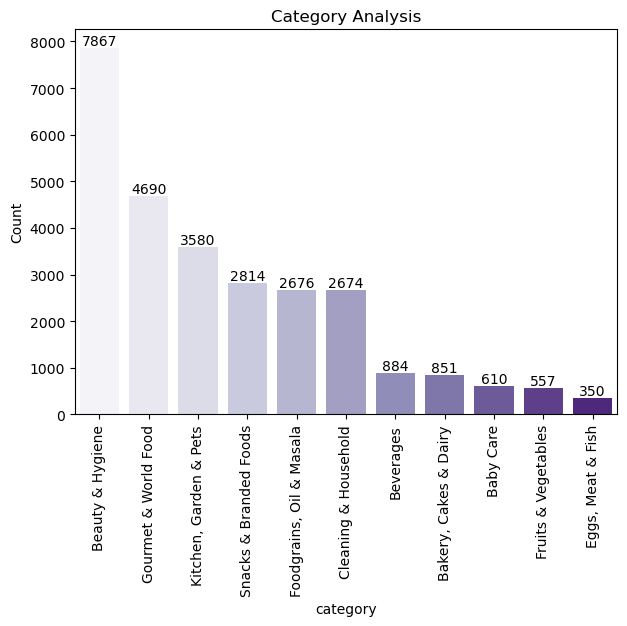

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
ax=sns.barplot(x=category_value.index, y=category_value.values, palette="Purples")
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel('Count')
plt.title('Category Analysis')
plt.show()


In [154]:
#plot a graph in which we want a subcategory rating  tht hold these conditon true -- 1- category=beauty and hygine ,,2 - rating >= 4 and brand should not be others

In [155]:
filter1=super_data[(super_data.category=='Beauty & Hygiene') & (super_data.rating>=4) & (super_data.brand!='others')]
filter1

,index,product,category,sub_category,brand,sale_price,market_price,type,rating
67,68,others,Beauty & Hygiene,others,Colgate,374.25,499.0,others,4.0
70,71,others,Beauty & Hygiene,others,Colgate,43.00,43.0,others,4.0
114,115,others,Beauty & Hygiene,Skin Care,Soulflower,182.75,215.0,Aromatherapy,4.0
175,176,others,Beauty & Hygiene,Skin Care,Soulflower,328.00,450.0,Aromatherapy,4.5
202,203,others,Beauty & Hygiene,Fragrances & Deos,Nike,278.40,348.0,others,4.1
...,...,...,...,...,...,...,...,...,...
27460,27461,others,Beauty & Hygiene,Skin Care,Soulflower,360.00,450.0,Aromatherapy,4.8
27472,27473,others,Beauty & Hygiene,Skin Care,Himalaya,76.50,90.0,Face Care,4.2
27496,27497,others,Beauty & Hygiene,others,Colgate,156.00,208.0,others,4.3
27527,27528,others,Beauty & Hygiene,others,Colgate,115.00,170.0,others,4.3


C:\Users\Salma K\AppData\Local\Temp\ipykernel_1912\2182072705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filter1,x='sub_category',y='rating',palette="Purples")


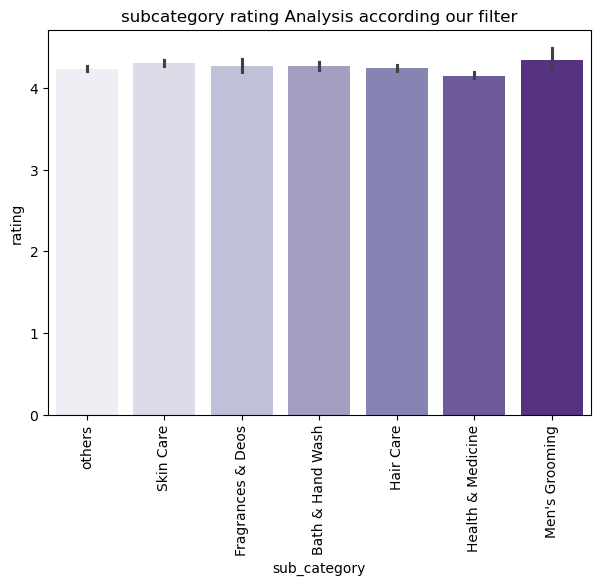

In [156]:
plt.figure(figsize=(7,5))
sns.barplot(data=filter1,x='sub_category',y='rating',palette="Purples")
plt.xticks(rotation=90)
plt.ylabel('rating')
plt.title('subcategory rating Analysis according our filter')
plt.show()

C:\Users\Salma K\AppData\Local\Temp\ipykernel_1912\2068551771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=filter1,x='sub_category',y='rating',palette="Purples")


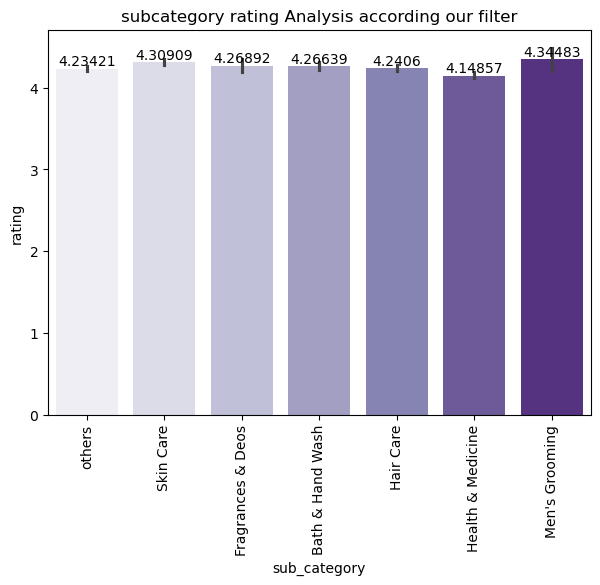

In [157]:
plt.figure(figsize=(7,5))
ax=sns.barplot(data=filter1,x='sub_category',y='rating',palette="Purples")
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel('rating')
plt.title('subcategory rating Analysis according our filter')
plt.show()

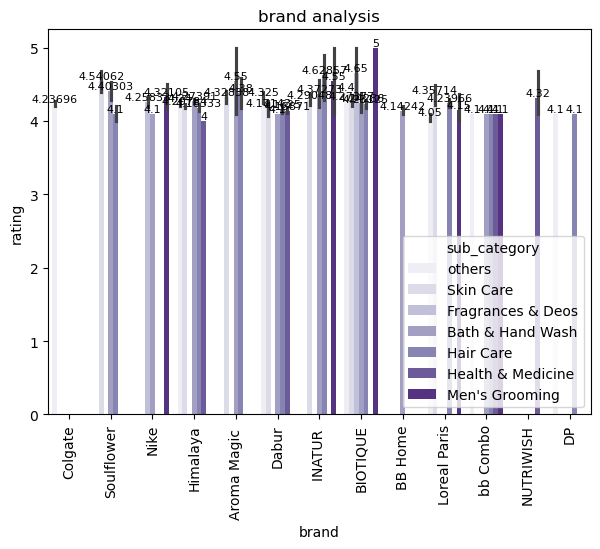

In [161]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=filter1.brand,y=filter1.rating,hue=filter1.sub_category,palette="Purples")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,fontsize=8)
plt.ylabel('rating')
plt.title('brand Analysis according our filter')
plt.show()

In [ ]:
#key insight---category based on highest sales